 # CSE-221710309062-anirudh reddy

Read the data from the below URL: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv

Get the frequency of the output categories and visualize it

Apply the Decision Tree Algorithm and Visualize the Decision Tree

Compare the performance of training scores and testing scores and check whether the model is overfitting to the data

In order to overcome OverFitting, apply some hyper parameter tuning with help of GridSearch and build the model with the best parameters given by GridSearch

https://docs.google.com/document/d/1s1fKDyTAEHgV66MEPhdhWMosTtcaw8zbXL3S9XC6Ftg/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:

df.shape

(150, 6)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Unnamed: 0      150 non-null int64
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:

df.drop(df[df.duplicated()].index,inplace=True)

In [6]:
df.shape

(150, 6)

In [7]:
df.isna().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:

df.Species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

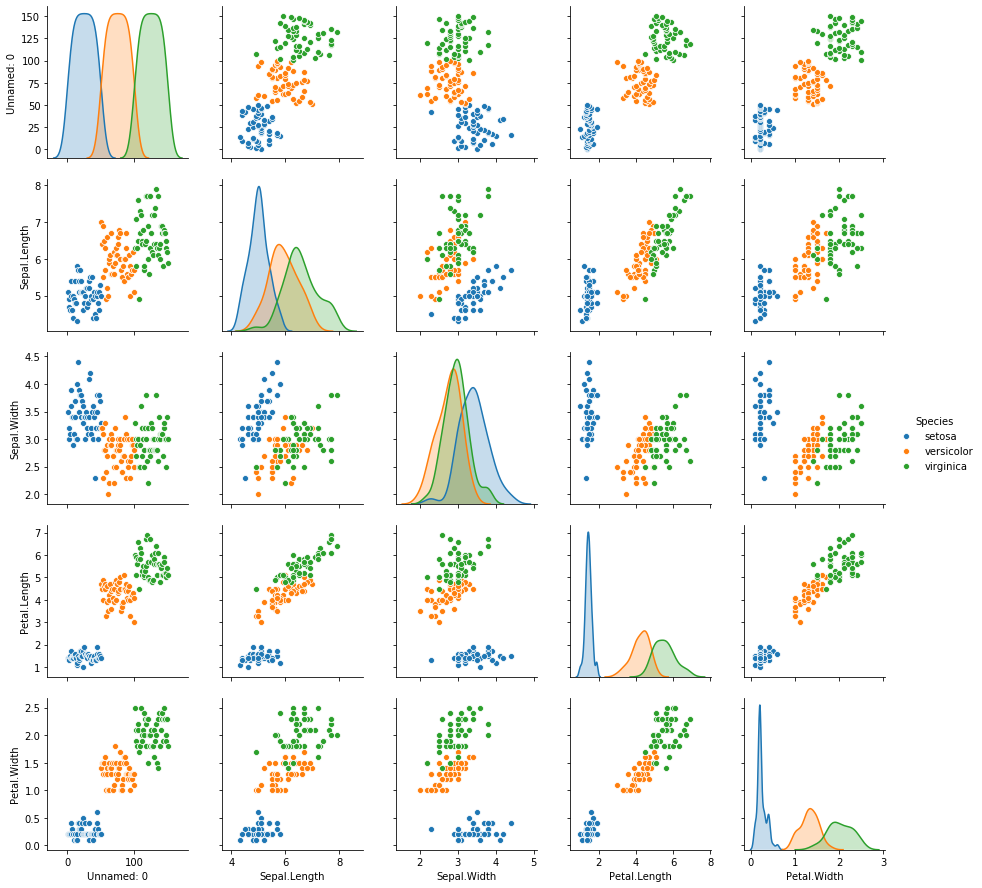

In [9]:
sns.pairplot(df,hue="Species")

In [10]:
df.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


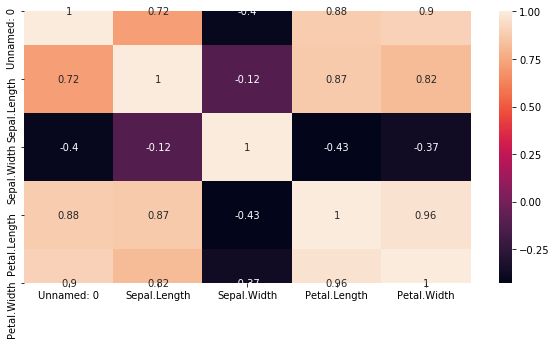

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [12]:
x=df.drop("Species",axis=1)
x


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [13]:
y=df.Species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 5)
(120,)
(30, 5)
(30,)


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
y_train_pred=dtc.predict(x_train)

In [19]:

accuracy_score(y_train,y_train_pred)

1.0

In [20]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [21]:
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [22]:
y_pred=dtc.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [24]:

confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)